In [1]:
# Makhtar Sylla
# MTH 448 Spring 21
# Project 1: Reconizing digits with K-NN

In [2]:
import numpy as np
from statistics import mode

The function knn takes a 2-dimensional array for training data, a 1-dimensional for containing labels, a 1-dimensional array with a data point, and an interger as the number of neighbors to use.
we use the Euclidean Distance √(∑(xi - yi)2 where xi is a index of to the data point and yi belongs to an image the training data

In [3]:
def knn(training_data, training_labels, x, n):
    
    euclid_sum = 0            # sum((xi - yi)2) for every xi and yi.  
    euclideanDistance = []    # a list of Euclidean distances. 
    
    for i in range(len(training_data)):
        row_data = training_data[i]
        for j in range(len(x)):
            euclid_sum += (x[j] - row_data[j])**2
        euclideanDistance.append(np.sqrt(euclid_sum))
        euclid_sum = 0
    
    # nearest: list of indeces of the images to use for classification
    # neighbors: list of labels corresponding to the images index in nearest
    # mode from statistics is use the select the most common elements from the labels in nearest as the predicted label.
    myArray = np.argsort(euclideanDistance)
    nearest = myArray[:n]              
    neighbors = []
    for i in range(len(nearest)):
        neighbors.append(training_labels[nearest[i]])
    label = mode(neighbors)
    
    return (label, np.sort(nearest))

Load, process, and cleand the data.
For the images, the pixels start from the 16th byte.
For the label, the digits start from the 8th byte.
We will load 25 images.

In [4]:
import gzip
with gzip.open("train-images-idx3-ubyte.gz", "rb") as foo:
    f= foo.read()
image = np.array([b for b in f[16:19616]]).reshape(-1, 28*28)
with gzip.open("train-labels-idx1-ubyte.gz", "rb") as buzz:
    bz= buzz.read()
lab = np.array([b for b in bz[8:]])

We begin by predicting 4 labels, then check wheither they are correct

In [5]:
image_a = knn(image, lab, image[8], 5)
image_a

(1, array([ 6,  8, 14, 18, 19], dtype=int64))

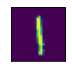

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])

plt.imshow(image[8].reshape(28, 28))

In [7]:
image_b = knn(image, lab, image[11], 5)
image_b

(1, array([ 3,  8, 11, 14, 23], dtype=int64))

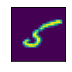

In [8]:
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.imshow(image[11].reshape(28, 28))

In [9]:
image_c = knn(image, lab, image[15], 5)
image_c

(9, array([ 4,  9, 15, 19, 22], dtype=int64))

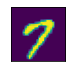

In [10]:
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.imshow(image[15].reshape(28, 28))

In [11]:
image_d = knn(image, lab, image[19], 5)
image_d

(9, array([ 8, 15, 17, 19, 22], dtype=int64))

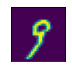

In [12]:
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.imshow(image[19].reshape(28, 28))

The first test shows that 2 of the predictions were correct, and the other 2 did not match.
Now we are going to test again by changing the the number of neighbors n to use for classification.

In [13]:
# Increasing n for a previously correct prediction
# in the previous test we checked that image_a is 1.
image_a = knn(image, lab, image[8], 13)
image_a

(1, array([ 3,  4,  6,  8,  9, 10, 11, 14, 18, 19, 22, 23, 24], dtype=int64))

In [14]:
# Increasing n for image_d which was rightly predicted to be 9
image_d = knn(image, lab, image[19], 13)
image_d

(1, array([ 3,  4,  6,  8,  9, 11, 14, 15, 17, 18, 19, 22, 23], dtype=int64))

In [15]:
# Increasing n for a previously incorrect prediction.
image_b = knn(image, lab, image[11], 13)
image_b
# We know that image_b is 5 from a test above.

(1, array([ 2,  3,  6,  8,  9, 11, 14, 17, 18, 19, 22, 23, 24], dtype=int64))

In [16]:
# Increasing n for another prediction that was incorrect
image_c = knn(image, lab, image[15], 13)
image_c
# It was showed that image_c is 7 

(1, array([ 3,  4,  5,  8,  9, 11, 14, 15, 17, 19, 22, 23, 24], dtype=int64))

The prediction of image_b and image_c is still incorrect, while image_d becomes incorrect when n increasing.

In [17]:
# Now we decrease n for the prediction of image_b and image_c.
# Remember that the true labels for these images are 5 and 9 respectively.

print(knn(image, lab, image[11], 3))
knn(image, lab, image[15], 3)

(1, array([ 3, 11, 23], dtype=int64))


(9, array([15, 19, 22], dtype=int64))

Image_c is correct but not image_b. 
Now we will slowly decrease n for image_b to find what is the turning point.

In [18]:
i = 10
while (i>1):
    print(knn(image, lab, image[11], i))
    print()
    i -= 1

(1, array([ 3,  8,  9, 11, 14, 17, 18, 19, 22, 23], dtype=int64))

(1, array([ 3,  8,  9, 11, 14, 18, 19, 22, 23], dtype=int64))

(1, array([ 3,  8,  9, 11, 14, 19, 22, 23], dtype=int64))

(1, array([ 3,  8,  9, 11, 14, 22, 23], dtype=int64))

(1, array([ 3,  8, 11, 14, 22, 23], dtype=int64))

(1, array([ 3,  8, 11, 14, 23], dtype=int64))

(1, array([ 3, 11, 14, 23], dtype=int64))

(1, array([ 3, 11, 23], dtype=int64))

(5, array([11, 23], dtype=int64))



In [19]:
# To understand better the output of the cell above (image_b), we test in a similar way image_d which had similar behavior
# The true label of image_d is 9.
i = 12
while (i>1):
    print(knn(image, lab, image[19], i))
    print()
    i -= 1

(1, array([ 3,  4,  6,  8,  9, 14, 15, 17, 18, 19, 22, 23], dtype=int64))

(1, array([ 3,  4,  6,  8,  9, 14, 15, 17, 19, 22, 23], dtype=int64))

(1, array([ 3,  4,  8,  9, 14, 15, 17, 19, 22, 23], dtype=int64))

(9, array([ 4,  8,  9, 14, 15, 17, 19, 22, 23], dtype=int64))

(9, array([ 4,  8,  9, 14, 15, 17, 19, 22], dtype=int64))

(9, array([ 4,  8, 14, 15, 17, 19, 22], dtype=int64))

(9, array([ 8, 14, 15, 17, 19, 22], dtype=int64))

(9, array([ 8, 15, 17, 19, 22], dtype=int64))

(9, array([15, 17, 19, 22], dtype=int64))

(9, array([17, 19, 22], dtype=int64))

(9, array([19, 22], dtype=int64))



Lets do the same thing to with image_a, which has always been correct, and image_c by increasing n this time.

In [20]:
# We rightly predicted image_a as 1.
i = 1
while (i<13):
    print(knn(image, lab, image[8], i))
    print()
    i += 1

(1, array([8], dtype=int64))

(1, array([ 8, 14], dtype=int64))

(1, array([ 6,  8, 14], dtype=int64))

(1, array([ 6,  8, 14, 19], dtype=int64))

(1, array([ 6,  8, 14, 18, 19], dtype=int64))

(1, array([ 6,  8, 14, 18, 19, 22], dtype=int64))

(1, array([ 4,  6,  8, 14, 18, 19, 22], dtype=int64))

(1, array([ 4,  6,  8, 11, 14, 18, 19, 22], dtype=int64))

(1, array([ 4,  6,  8, 11, 14, 18, 19, 22, 23], dtype=int64))

(1, array([ 3,  4,  6,  8, 11, 14, 18, 19, 22, 23], dtype=int64))

(1, array([ 3,  4,  6,  8, 11, 14, 18, 19, 22, 23, 24], dtype=int64))

(1, array([ 3,  4,  6,  8, 10, 11, 14, 18, 19, 22, 23, 24], dtype=int64))



In [21]:
# Image_c holds the number 7.
i = 1
while (i<13):
    print(knn(image, lab, image[15], i))
    print()
    i += 1

(7, array([15], dtype=int64))

(7, array([15, 19], dtype=int64))

(9, array([15, 19, 22], dtype=int64))

(9, array([ 4, 15, 19, 22], dtype=int64))

(9, array([ 4,  9, 15, 19, 22], dtype=int64))

(9, array([ 4,  9, 15, 17, 19, 22], dtype=int64))

(9, array([ 4,  5,  9, 15, 17, 19, 22], dtype=int64))

(9, array([ 4,  5,  9, 15, 17, 19, 22, 24], dtype=int64))

(9, array([ 4,  5,  9, 15, 17, 19, 22, 23, 24], dtype=int64))

(9, array([ 3,  4,  5,  9, 15, 17, 19, 22, 23, 24], dtype=int64))

(1, array([ 3,  4,  5,  8,  9, 15, 17, 19, 22, 23, 24], dtype=int64))

(1, array([ 3,  4,  5,  8,  9, 14, 15, 17, 19, 22, 23, 24], dtype=int64))



## Conlusions:
Interestingly, we discovered that the predictions are more accurate, for some images like image_d (image[19]), as n, the number of neighbors used for classification, gets smaller. For image_b (image[11]) the prediction is correct only if n equals 1.

In contrast with image_b and image_d, the prediction of image_c is more accurate as n increases. It contains the number 7, but is confused with 9 most of the time or 1 as n becomes very small.

For other images, like image_a, the prediction is always correct for 0<n<14. It happens that image_a contains the number 1 which is the simplest and easiest number to draw but also the hardest to be confused with any other number. This is probably why its prediction has been easy too.